# House price analysis in France
Christophe Sebastien (tel: 0768282305)

This small script analyse and estimate the price of houses in France

All the house market transactions of the last 5 years in France are available here:
 * The data description is available here:
https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/

 * Data can be downloaded here:
https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/

We will apply a step by step approach:

- Step 1: Data engineering: we create an ETL pipeline
            - Extract (load in memory the data)
            - Transform (clean and put the data a easy to use for machine learning)
            - Load (export the data in a database format).
            
- Step 2: Data analysis: we create statistics and plots to understand the data
            - Statistical analysis
            - Graphs

- Step 3: Data Science: we create a predictive model using machine learning 
            - simple approach using Random Forest
            - advanced approach using neural networks

## Step 0: Initialisation: libraries and file location

TODO: change the path variable Myfolder to your computer's path

In [ ]:

# Go to personal folder
from google.colab import drive
drive.mount('/content/gdrive')  # access drive
%cd gdrive/My\ Drive/Colab\ Notebooks/

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
import io

In [ ]:


df_2020 = pd.read_csv('full2020.csv')
df_2019 = pd.read_csv('full2019.csv')
df_2018 = pd.read_csv('full2018.csv')
df_2017 = pd.read_csv('full2017.csv')
df_2016 = pd.read_csv('full2016.csv')
df_2015 = pd.read_csv('full2015.csv')
df_2014 = pd.read_csv('full2014.csv')


df_2020
df_2019

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,12,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10,12,14,16,17,18,20,22,26,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,12,14,16,17,18,20,22,24,26,35,36) have mixed types.Specify dtype option on import or se

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2019-1,2019-01-04,1,Vente,37220.0,26.0,NaN,RUE DE MONTHOLON,2730,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AI0298,NaN,NaN,8,19.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,20.0,1.0,NaN,NaN,NaN,NaN,NaN,5.209562,46.198840
1,2019-2,2019-01-04,1,Vente,185100.0,22.0,NaN,RUE GEN DELESTRAINT,1650,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AM0095,NaN,NaN,137,NaN,154,61.51,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,62.0,3.0,NaN,NaN,NaN,NaN,NaN,5.219396,46.198766
2,2019-2,2019-01-04,1,Vente,185100.0,22.0,B,RUE GEN DELESTRAINT,1650,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AM0095,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.219396,46.198766
3,2019-3,2019-01-08,1,Vente,209000.0,3.0,NaN,RUE DES CHAMPAGNES,0043,1160.0,1314,Priay,1,NaN,NaN,013140000E1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,90.0,4.0,S,sols,NaN,NaN,940.0,5.282104,45.999566
4,2019-4,2019-01-07,1,Vente,134900.0,5.0,NaN,LOT LE BIOLAY,A003,1370.0,1350,Saint-Étienne-du-Bois,1,NaN,NaN,01350000AA0011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,101.0,5.0,S,sols,NaN,NaN,490.0,5.299929,46.293278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142947,2019-1352701,2019-12-30,1,Vente,1400000.0,24.0,NaN,RUE SAINT SAUVEUR,8752,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AM0018,NaN,NaN,3,101.40,4,43.70,8,NaN,NaN,NaN,NaN,NaN,3,4.0,Local industriel. commercial ou assimilé,100.0,0.0,NaN,NaN,NaN,NaN,NaN,2.348095,48.866431
3142948,2019-1352701,2019-12-30,1,Vente,1400000.0,24.0,NaN,RUE SAINT SAUVEUR,8752,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AM0018,NaN,NaN,10,43.70,14,55.40,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,97.0,3.0,NaN,NaN,NaN,NaN,NaN,2.348095,48.866431
3142949,2019-1352702,2019-12-17,1,Adjudication,620000.0,14.0,NaN,RUE PAVEE,7195,75004.0,75104,Paris 4e Arrondissement,75,NaN,NaN,75104000AM0014,NaN,NaN,3,48.50,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,45.0,2.0,NaN,NaN,NaN,NaN,NaN,2.360708,48.856187
3142950,2019-1352703,2019-12-05,1,Vente,370000.0,23.0,NaN,RUE POISSONNIERE,7561,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AH0067,NaN,NaN,1,38.65,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,Local industriel. commercial ou assimilé,47.0,0.0,NaN,NaN,NaN,NaN,NaN,2.347484,48.869730


In [ ]:
df_2014

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2014-1,2014-01-09,1,Vente,251500.0,532.0,NaN,RTE DE MEZERIAT,0006,1310.0,1301,Polliat,1,NaN,NaN,01301000AH0260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,147.0,5.0,S,sols,NaN,NaN,1501.0,5.119191,46.247576
1,2014-2,2014-01-09,1,Vente,174500.0,22.0,NaN,BD MAL LECLERC,2540,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AE0111,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.218208,46.204017
2,2014-2,2014-01-09,1,Vente,174500.0,22.0,NaN,BD MAL LECLERC,2540,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AE0111,NaN,NaN,49,94.22,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,80.0,2.0,NaN,NaN,NaN,NaN,NaN,5.218208,46.204017
3,2014-3,2014-01-02,1,Vente,157500.0,1389.0,NaN,RTE DE STRASBOURG,0201,1440.0,1451,Viriat,1,NaN,NaN,01451000ZO0157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,sols,NaN,NaN,24.0,5.262505,46.236179
4,2014-3,2014-01-02,1,Vente,157500.0,1369.0,NaN,RTE DE STRASBOURG,0201,1440.0,1451,Viriat,1,NaN,NaN,01451000ZO0158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,103.0,4.0,S,sols,NaN,NaN,1569.0,5.262756,46.236276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516797,2014-1090321,2014-12-22,1,Vente,300000.0,33.0,NaN,RUE BEAUREGARD,0789,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AO0036,NaN,NaN,10,34.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,36.0,2.0,NaN,NaN,NaN,NaN,NaN,2.350891,48.869637
2516798,2014-1090322,2014-11-06,1,Adjudication,195000.0,190.0,NaN,RUE SAINT DENIS,8525,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AN0153,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,32.0,1.0,NaN,NaN,NaN,NaN,NaN,2.351503,48.866875
2516799,2014-1090323,2014-10-23,1,Adjudication,110000.0,6.0,NaN,RUE DALAYRAC,2517,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AD0119,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,15.0,1.0,NaN,NaN,NaN,NaN,NaN,2.335153,48.867376
2516800,2014-1090324,2014-12-24,1,Vente,200000.0,10.0,NaN,RUE SAINT MARC,8686,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AG0062,NaN,NaN,104,109.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Local industriel. commercial ou assimilé,109.0,0.0,NaN,NaN,NaN,NaN,NaN,2.341525,48.870500


In [ ]:
df_2015

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2015-1,2015-01-05,2,Vente,120.0,NaN,NaN,ENTRE LES CHEMINS,B181,1250.0,1245,Bohas-Meyriat-Rignat,1,NaN,NaN,012450480B0805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,P,prés,NaN,NaN,82.0,5.393771,46.161144
1,2015-2,2015-01-09,1,Vente,12400.0,NaN,NaN,VIGNIEUX,B100,1340.0,1196,Jayat,1,NaN,NaN,011960000A0981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,AB,terrains a bâtir,NaN,NaN,1550.0,5.116832,46.378377
2,2015-3,2015-01-05,2,Vente,110.0,NaN,NaN,ENTRE LES CHEMINS,B181,1250.0,1245,Bohas-Meyriat-Rignat,1,NaN,NaN,012450480B0799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,P,prés,NaN,NaN,4.0,5.394334,46.161161
3,2015-4,2015-01-07,2,Vente,180.0,NaN,NaN,ENTRE LES CHEMINS,B181,1250.0,1245,Bohas-Meyriat-Rignat,1,NaN,NaN,012450480B0798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,P,prés,NaN,NaN,298.0,5.394796,46.161583
4,2015-5,2015-01-12,1,Vente,95000.0,5383.0,NaN,LE BOURG,B026,1160.0,1314,Priay,1,NaN,NaN,013140000E0644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,S,sols,NaN,NaN,195.0,5.291586,46.002868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750300,2015-1186256,2015-07-22,1,Vente,223000.0,141.0,NaN,RUE SAINT DENIS,8525,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AL0053,NaN,NaN,182,NaN,195,19.11,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,19.0,1.0,NaN,NaN,NaN,NaN,NaN,2.349790,48.864588
2750301,2015-1186257,2015-09-17,1,Adjudication,65000.0,16.0,NaN,RUE ETIENNE MARCEL,3392,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AL0156,NaN,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,12.0,1.0,NaN,NaN,NaN,NaN,NaN,2.348714,48.864274
2750302,2015-1186258,2015-05-07,1,Adjudication,366000.0,16.0,NaN,RUE GRENETA,4318,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AM0067,NaN,NaN,1,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,Local industriel. commercial ou assimilé,30.0,0.0,NaN,NaN,NaN,NaN,NaN,2.351267,48.865305
2750303,2015-1186259,2015-10-29,1,Vente,38000.0,17.0,NaN,PL DES VOSGES,9917,75004.0,75104,Paris 4e Arrondissement,75,NaN,NaN,75104000AO0003,NaN,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.364451,48.856055


In [ ]:
# Go to personal folder
#! cd C:\Users\nicolas.andraud\OneDrive - NAVBLUE Inc\Documents\AccroHome\DATA
#install virtualenv to create new Python environements
!pip install virtualenv 
# Create a local Python environement in the current directory
!virtualenv HPA 

     |████████████████████████████████| 7.2MB 15.3MB/s 
     |████████████████████████████████| 348kB 46.7MB/s 
created virtual environment CPython3.7.10.final.0-64 in 23987ms
  creator CPython3Posix(dest=/content/gdrive/My Drive/Colab Notebooks/HPA, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==21.0.1, pip==21.1.2, setuptools==54.1.2, setuptools==57.0.0, wheel==0.36.2
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator


In [ ]:
#!pip install -U tensorflow-gpu==2.0.0 grpcio
#!pip install -- tensorflow-federated
!pip install --upgrade pip
!pip install tensorflow




  Using cached https://files.pythonhosted.org/packages/47/ca/f0d790b6e18b3a6f3bd5e80c2ee4edbb5807286c21cdd0862ca933f751dd/pip-21.1.3-py3-none-any.whl
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
# Decalaration of librairies = Python extensions
# ----------------------------------
import pandas as pd # Import pandas librairy: Pandas is a kind of super Excel in Python
import matplotlib.pyplot as plt # matplotlib is a general purpose librairy for graphics
from scipy import stats # scipy stats is a librairy of statistical funstions
import numpy as np # numpy is a librairy to manipulate matrix / tables
from pandas import Grouper # to group data and make cool graphs
import seaborn as sns # to plot data analysis graphs
from sklearn.model_selection import train_test_split # for machine learning
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # for machine learning
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor # for machine learning
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# function to plot graphic within the Jupyter notebook
%matplotlib inline  

In [ ]:
from matplotlib import pyplot




In [ ]:
import tensorflow as tf
print(tf.__version__)
%load_ext tensorboard

2.5.0


In [ ]:
"""!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)"""

'!pip install -U -q PyDrive\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n# Authenticate and create the PyDrive client.\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)'

In [ ]:
# Data location
# ----------------------------------
# TODO: change path to match location of the data on your drive

link = {
    'full2014.csv.gz' : 'https://drive.google.com/open?id=1NBzLyBKcA5VW7VIvFLU2mxLrH9Lrk-3M',
    'full2015.csv.gz' : 'https://drive.google.com/open?id=1WzrQ_J2rIOB-pFkoM7DcRgzgOVfWeT6L',
    'full2016.csv.gz' : 'https://drive.google.com/open?id=1qEj5pPx19PgHUxH61TseAMEN8ScFFv6B',
    'full2017.csv.gz' : 'https://drive.google.com/open?id=1LxsrAyQLZh0rXSniIFGysjfjqYBG4GkJ',
    'full2018.csv.gz' : 'https://drive.google.com/open?id=1hDog5F5U3Fvdbbb2fgU4YlF3TMKQcTW4',
}

file_names = ['full2014.csv.gz', 'full2015.csv.gz', 'full2016.csv.gz', 'full2017.csv.gz', 'full2018.csv.gz']


In [ ]:
file_names = ['full.csv.gz']

In [ ]:
file_names1 =['full2014.csv','full2015.csv','full2016.csv','full2017.csv','full2018.csv','full2019.csv','full2020.csv']

## Step 1: Data Engineering: ETL: Extract Transform Load

### 1.1. ETL: Extract part

In [ ]:
# Function to read data
# ----------------------------------
def read_dvf(file_names, cols, typecols, nlines):
    """
    read_dvf(filein, cols, typecols, nlines)
    Read all the csv files in filein dictionnary
    Read only the columns in cols list
    Convert the data in each columns using typecols types list
    Read only the first nlines lines of the table or None to read all of them.
    Example:
        filein[0] = "C:\\Users\\th81ce\\Desktop\\Immo\\Data_Immo\\valeursfoncieres-2014.txt"
        cols = ['Date mutation', 'Nature mutation']
        typecol = {'Nature mutation':str, 'Code postal':int]
        nlines = 100
        data = read_dvf(filein, cols, typecols, nlines)
    """
    data = pd.DataFrame()   # dataframe containing all read out data  
    for file in file_names:
        # print (' - Read file ', id+1 , '/', nb_files)
        
        datatxt = pd.read_csv(file, sep =',' , header = 0 , decimal = '.' ,
                              usecols=cols , dtype = typecols)                                      
        data = pd.concat([data,datatxt])
        print ('    ' , data.shape[0] , ' transactions in memory')
    return data

In [ ]:
# Read data (and select interesting quantities to read and assign a type)
# ----------------------------------
# Range of DVF available years
Firstyear = 2014
Lastyear = 2020
Filename = file_names1
FileExtension  = '.csv'

# Build filename
# filein = dict()
# i_filein = 0
# for year in range(Firstyear, Lastyear+1):  
#         filein[i_filein] = Myfolder + Filename + str(year)  + FileExtension
#         i_filein += 1
# 
# filein = 
# 
# Quantities to read out   
cols = ['date_mutation', 'nature_mutation', 'valeur_fonciere',\
    'adresse_numero', 'adresse_suffixe', 'adresse_nom_voie',\
    'code_postal', 'nom_commune', 'code_departement',\
    'type_local', 'surface_reelle_bati','nombre_pieces_principales',\
    'nature_culture', 'surface_terrain', 'longitude', 'latitude']

typecols = {'date_mutation':str,
            'nature_mutation':str,
            'valeur_fonciere':float,                
            'adresse_numero':float,
            'adresse_suffixe':str,
            'adresse_nom_voie':str,
            'code_postal':float,
            'nom_commune':str,
            'code_departement':str,
            'type_local':str,
            'surface_reelle_bati':float,
            'nombre_pieces_principales':float,
            'nature_culture':str,
            'surface_terrain':float,
            'longitude':float,
            'latitude':float}
# Read data
data = read_dvf(file_names1, cols, typecols, None)

     2516802  transactions in memory
     5267107  transactions in memory
     8206111  transactions in memory
     11587301  transactions in memory
     14906727  transactions in memory
     18049679  transactions in memory
     18876784  transactions in memory


In [ ]:
print (data)

       date_mutation nature_mutation  ...  longitude   latitude
0         2014-01-09           Vente  ...   5.119191  46.247576
1         2014-01-09           Vente  ...   5.218208  46.204017
2         2014-01-09           Vente  ...   5.218208  46.204017
3         2014-01-02           Vente  ...   5.262505  46.236179
4         2014-01-02           Vente  ...   5.262756  46.236276
...              ...             ...  ...        ...        ...
827100    2020-06-30           Vente  ...   2.344134  48.865842
827101    2020-06-26           Vente  ...   2.347903  48.867536
827102    2020-06-25           Vente  ...   2.359936  48.854633
827103    2020-06-23           Vente  ...   2.336652  48.867463
827104    2020-06-11           Vente  ...   2.345110  48.868196

[18876784 rows x 16 columns]


### 1.2. ETL: Transform part

In [ ]:
# Rename the columns names to english.
# ----------------------------------
# Create a dictionnary
Names2English = {
    "date_mutation": "Transaction date",
    "nature_mutation": "Transaction type",       
    "valeur_fonciere": "Transaction cost",        
    "adresse_numero": "Adress number",           
    "adresse_suffixe": "Adress number extension",         
    "adresse_nom_voie": "Adress street name",          
    "code_postal": "Postcode",                
    "nom_commune": "Town",             
    "code_departement": "Department",          
    "type_local": "Type of property",              
    "surface_reelle_bati": "Built surface",        
    "nombre_pieces_principales": "Number of rooms",  
    "nature_culture": "Type of ground",           
    "surface_terrain": "Ground surface",          
    "longitude": "Longitude",               
    "latitude": "Latitude"}               

# Rename the columns name to English
data.rename(columns = Names2English, inplace = True)

We do a bit of Data Analytics to best clean the data

In [ ]:
# Display general data structure information
# ----------------------------------
print ('Data Structure')
data.info()

Data Structure
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18876784 entries, 0 to 827104
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Transaction date         object 
 1   Transaction type         object 
 2   Transaction cost         float64
 3   Adress number            float64
 4   Adress number extension  object 
 5   Adress street name       object 
 6   Postcode                 float64
 7   Town                     object 
 8   Department               object 
 9   Type of property         object 
 10  Built surface            float64
 11  Number of rooms          float64
 12  Type of ground           object 
 13  Ground surface           float64
 14  Longitude                float64
 15  Latitude                 float64
dtypes: float64(8), object(8)
memory usage: 2.4+ GB


We have 16 columns = 16 features

We have 18.9 millions of real estate transactions = observations

In [ ]:
data.head(10)

,Transaction date,Transaction type,Transaction cost,Adress number,Adress number extension,Adress street name,Postcode,Town,Department,Type of property,Built surface,Number of rooms,Type of ground,Ground surface,Longitude,Latitude
0,2014-01-09,Vente,251500.0,532.0,NaN,RTE DE MEZERIAT,1310.0,Polliat,01,Maison,147.0,5.0,sols,1501.0,5.119191,46.247576
1,2014-01-09,Vente,174500.0,22.0,NaN,BD MAL LECLERC,1000.0,Bourg-en-Bresse,01,Dépendance,NaN,0.0,NaN,NaN,5.218208,46.204017
2,2014-01-09,Vente,174500.0,22.0,NaN,BD MAL LECLERC,1000.0,Bourg-en-Bresse,01,Appartement,80.0,2.0,NaN,NaN,5.218208,46.204017
3,2014-01-02,Vente,157500.0,1389.0,NaN,RTE DE STRASBOURG,1440.0,Viriat,01,NaN,NaN,NaN,sols,24.0,5.262505,46.236179
4,2014-01-02,Vente,157500.0,1369.0,NaN,RTE DE STRASBOURG,1440.0,Viriat,01,Maison,103.0,4.0,sols,1569.0,5.262756,46.236276
5,2014-01-06,Vente,280.5,NaN,NaN,AUX RAVETTES,1250.0,Villereversure,01,NaN,NaN,NaN,prés,535.0,5.410388,46.204227
6,2014-01-07,Vente,90000.0,4.0,NaN,RUE GEN DELESTRAINT,1000.0,Bourg-en-Bresse,01,Dépendance,NaN,0.0,NaN,NaN,5.219821,46.200397
7,2014-01-07,Vente,90000.0,4.0,NaN,RUE GEN DELESTRAINT,1000.0,Bourg-en-Bresse,01,Appartement,61.0,2.0,NaN,NaN,5.219821,46.200397
8,2014-01-11,Vente,370000.0,215.0,NaN,RTE DE LA GRANDE VAVRETTE,1250.0,Tossiat,01,Maison,220.0,8.0,sols,880.0,5.313121,46.141862
9,2014-01-11,Vente,370000.0,NaN,NaN,A LA BALETTE,1250.0,Tossiat,01,NaN,NaN,NaN,prés,437.0,5.313371,46.141657


This gives a view on the the content of the table

We have cells with NaN values

In [ ]:
data.describe()

,Transaction cost,Adress number,Postcode,Built surface,Number of rooms,Ground surface,Longitude,Latitude
count,1.862937e+07,1.089414e+07,1.870316e+07,7.639263e+06,1.024246e+07,1.302585e+07,1.822085e+07,1.822085e+07
mean,1.077112e+06,8.013862e+02,5.073269e+04,1.159108e+02,2.357411e+00,3.308974e+03,2.198893e+00,4.623986e+01
std,1.247364e+07,2.153711e+03,2.740582e+04,1.100338e+03,2.074929e+00,1.754617e+04,6.069495e+00,5.434772e+00
min,1.000000e-02,1.000000e+00,1.000000e+03,1.000000e+00,0.000000e+00,1.000000e+00,-6.315233e+01,-2.138676e+01
25%,5.350000e+04,8.000000e+00,2.962000e+04,4.900000e+01,0.000000e+00,2.350000e+02,2.117210e-01,4.480208e+01
50%,1.398000e+05,2.500000e+01,4.948000e+04,7.500000e+01,2.000000e+00,6.270000e+02,2.330091e+00,4.683744e+01
75%,2.500000e+05,1.000000e+02,7.501600e+04,1.030000e+02,4.000000e+00,1.960000e+03,4.373713e+00,4.871256e+01
max,3.300000e+09,9.999000e+03,9.749000e+04,8.779260e+05,1.120000e+02,2.142814e+07,5.582861e+01,5.108207e+01


We can see that there are clear outliers:

For example: The highest transaction cost is 3.3 Billion euros and the lowest is 0.01euros! Same for the surface, and so on.

In [ ]:
# Function to clean data
# ----------------------------------
def clean_data(data):
    """
    clean_data(data)
    Clean the pandas dataframe as follow:
        2.1. Replace by type 'Vente' (sell) all the naming involving vente (sell) activity.
        2.2. Remove all transactions not 'Vente' (sell)  (eg 'echange', 'expropriation',...)
        2.3. Convert the 'Transaction type' field from string to real date type
        2.4. Remove all transaction with the following missing information:
                - the price of the transaction ('Transaction cost')
                - the surface of the property ('Ground surface')
        2.5. the ground surface ('Ground surface'): replace Nan values by 0 for the ground surface       
        Example:
            data = clean_data(data)
    """
    print ('--> Different types of sales: (before treatment)')
    print(data['Transaction type'].unique())
    data['Transaction type'] = data['Transaction type'].replace(to_replace="^Vente", value="Vente", regex = True)
    #data['Nature mutation'] = data['Nature mutation'].replace(to_replace="Vente en l'état futur d'achèvement", value="Vente", regex = True)
    #data['Nature mutation'] = data['Nature mutation'].replace(to_replace="Vente terrain à bâtir", value="Vente", regex = True)
    print('--> Filter out all transactions not [Vente]')
    data = data[data['Transaction type'] == 'Vente']
    print ('--> Different types of sales: (after treatment)')
    print(data['Transaction type'].unique())
    
    # Manage NaN
    print ('--> Data cleaning for House and Flats (not for ground): number of NaN in the dataset')
    print(data.isna().sum())
    print ('--> Remove rows without [Transaction cost] and [Built surface] values')
    data = data.dropna('index', subset = ['Transaction cost', 'Built surface'])
    print ('--> Replace nan by 0 for [Ground surface]')
    data['Ground surface'] = data['Ground surface'].fillna(0)
    print(data.isna().sum())
    return data

In [ ]:
# Clean data
# ----------------------------------
NrowsOrg = data.shape[0] # Number of transaction before analysis
data = clean_data(data)  # Cleaning
# Overwriting data after changing format 
print ('--> Data cleaning: [Transaction date] to date')
data["Transaction date"]= pd.to_datetime(data["Transaction date"])

NrowsFinal = data.shape[0] # # Number of transactions after analysis
print ('\n Number of deleted transactions: ',(NrowsOrg-NrowsFinal),
       '(', round((NrowsOrg-NrowsFinal)/NrowsOrg*100),'%)' )

--> Different types of sales: (before treatment)
['Vente' 'Echange' "Vente en l'état futur d'achèvement"
 'Vente terrain à bâtir' 'Adjudication' 'Expropriation']
--> Filter out all transactions not [Vente]
--> Different types of sales: (after treatment)
['Vente']
--> Data cleaning for House and Flats (not for ground): number of NaN in the dataset
Transaction date                  0
Transaction type                  0
Transaction cost             224900
Adress number               7014903
Adress number extension    16322597
Adress street name            17729
Postcode                      18435
Town                              0
Department                        0
Type of property            7500397
Built surface               9797910
Number of rooms             7515775
Type of ground              4507461
Ground surface              4507800
Longitude                    572432
Latitude                     572432
dtype: int64
--> Remove rows without [Transaction cost] and [Built surface]

62% of the transaction have been removed
Most of them are due to missing value for the 'Built surface' (9 797 910 out of 11 682 896)

In [ ]:
#  Function to remove outliers
# ----------------------------------
def remove_oulier(data, Nsigma, Bounds):
    """
    remove_oulier(data, Nsigma)
    Remove the unlikely transaction based on human judgment: Bounds records
    Remove the outlier transactions (to avoid misleading analysis results)
    3.1. Display the original histogram and statistics for each feature
    3.2. Remove the outlier being outside of Nsigma times the standard deviation
         redisplay the update histogram and statistics
    Example:
        [data] = remove_oulier(data, 2)
    """    
   
    print ('--> Remove unlikely transactions:')
    print (data.shape[0],'transactions in memory')
    print ('       Built surface < ' , Bounds['Built surface min'] , ' m2 = official miminum surface for renting')
    print ('       Built surface > ' , Bounds['Built surface max'] , 'm2')
    print ('       Ground surface > ' , Bounds['Ground surface max'] , 'm2')
    print ('       Transaction cost < ' , Bounds['Transaction cost min'] , ' euros')
    print ('       Transaction cost > ' , Bounds['Transaction cost max'] , ' euros')      
    
    data = data[ (data['Built surface'] > Bounds['Built surface min']) &
         (data['Built surface'] < Bounds['Built surface max']) &
         (data['Ground surface'] < Bounds['Ground surface max']) &
         (data['Transaction cost'] > Bounds['Transaction cost min']) &
         (data['Transaction cost'] < Bounds['Transaction cost max'])]
    
    print (data.shape[0],'transactions in memory')

    print ('\n--> Original histograms and statistics:')
    datared = data[['Built surface', 'Ground surface', 'Transaction cost']]
    datared.hist()
    plt.show()
    print (datared.describe(percentiles = [.05, .5, .95]))
    print (data.shape[0],'transactions in memory')
    print ('--> Remove outliers:') 
    data = data[(np.abs(stats.zscore(datared)) < Nsigma).all(axis=1)]
    datared = data[['Built surface', 'Ground surface', 'Transaction cost']]
    datared.hist(bins = 10)
    plt.show()
    print (datared.describe(percentiles = [.05, .5, .95]))
    print (data.shape[0],'transactions in memory')
    return data

--> Remove unlikely transactions:
6381345 transactions in memory
       Built surface <  9  m2 = official miminum surface for renting
       Built surface >  1000 m2
       Ground surface >  100000 m2
       Transaction cost <  1000  euros
       Transaction cost >  10000000  euros
6381345 transactions in memory

--> Original histograms and statistics:


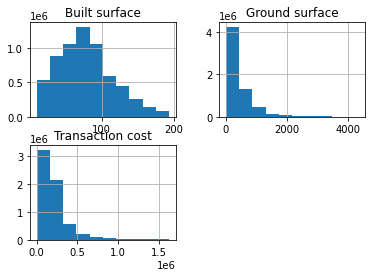

       Built surface  Ground surface  Transaction cost
count   6.381345e+06    6.381345e+06      6.381345e+06
mean    7.811465e+01    3.770741e+02      2.146334e+05
std     3.785822e+01    5.575366e+02      1.963637e+05
min     1.000000e+01    0.000000e+00      1.001000e+03
5%      2.300000e+01    0.000000e+00      4.100000e+04
50%     7.500000e+01    1.640000e+02      1.610000e+05
95%     1.500000e+02    1.397000e+03      5.750000e+05
max     1.930000e+02    4.323000e+03      1.625140e+06
6381345 transactions in memory
--> Remove outliers:


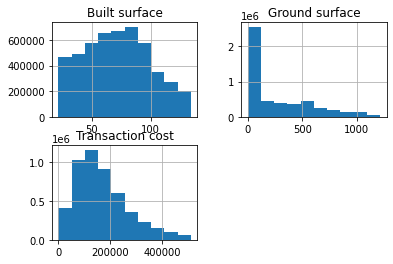

       Built surface  Ground surface  Transaction cost
count   4.969317e+06    4.969317e+06      4.969317e+06
mean    7.204151e+01    2.545838e+02      1.694966e+05
std     2.782614e+01    3.129190e+02      1.012600e+05
min     2.200000e+01    0.000000e+00      1.001000e+03
5%      2.800000e+01    0.000000e+00      4.000000e+04
50%     7.100000e+01    1.050000e+02      1.500000e+05
95%     1.200000e+02    9.230000e+02      3.770838e+05
max     1.340000e+02    1.213000e+03      5.091700e+05
4969317 transactions in memory


In [ ]:
# Remove ouliers
# ----------------------------------
Nsigma = 1.5 # any data superior to 1.5 times its standard deviation will be removed

# Bounds value to delete unrealistic transactions
Bounds = {
    "Built surface min": 9,
    "Built surface max": 1000,
    "Ground surface max": 100000,
    "Transaction cost min": 1000,
    "Transaction cost max": 10000000}   

# Remove ouliers
data = remove_oulier(data, Nsigma, Bounds)

### 1.3. ETL: Create new features

In [ ]:
# Create feature Price/m2
data['Cost per m2'] = round(data['Transaction cost']/data['Built surface'])

In [ ]:
# Create feature delta date
data['Delta days'] = data['Transaction date'] - data['Transaction date'].min()

In [ ]:
# Save data to drive : NOT AVAILABLE TODAY 
# data.to_pickle('data/test_data.pkl')

In [ ]:
# Save data to drive : NOT AVAILABLE TODAY 
# data = pd.read_pickle('data/test_data.pkl')

In [ ]:
# Convert categorical feature 'Type of property' to numerical values (OneHotEncoding)
data_cat = data['Type of property']
type_prop=pd.get_dummies(data_cat, drop_first=True)
data = pd.concat([data, type_prop], axis=1)

In [ ]:
data.head(4)

### 1.4. ETL: Export data (in HDF5 format)

In [ ]:
#  Function to save and load
# ----------------------------------
fileouth5='/content/gdrive/My Drive/Colab Notebooks/clean_data'
def DVF2HDF5(data, fileouth5):
    """
    DVF2HDF5(data, fileouth5)
    Export the DVF data into a HDF5 database file called (fileouth5)
    Exported 6 columns of type date,string, 4*int
    Example:
        DVF2HDF5(data, fileouth5)
    """    
    DataType = data.dtypes
                
    store = pd.HDFStore(fileouth5)
    store.put('data', data, format='table') #, data_columns = DataType)     
    store.close()
    return

def HDF52PD(fileouth5):
    """
    HDF52PD(fileouth5)
    Import the DVF data from a HDF5 database file called (fileouth5)
    Example:
        data = HDF52PD(fileouth5)
    """    
    store = pd.HDFStore(fileouth5)
    data = store['data']
    store.close()
    return data

In [ ]:
# Export data to H5 database: NOT AVAILABLE TODAY
# ----------------------------------
#fileouth5 = ("%s%s" % (Myfolder, H5database))
DVF2HDF5(data, fileouth5)
print ("Data exported to file: %s" % fileouth5)

In [ ]:
# Read data
dataLoaded = HDF52PD(fileouth5)
print ("Data imported from file: %s" % fileouth5)

Data imported from file: /content/gdrive/My Drive/Colab Notebooks/clean_data


In [ ]:

#print(data.equals(dataLoaded))
data=dataLoaded
print(data.shape)

(6381345, 21)


In [ ]:
data.head(10)

In this section we have:
    - E: loaded 5 files
    - T: merged the data & clean the data
    - L: experted the data to an HDF5 format

## Step 2: Data Analysis

In [ ]:
def keep_flat_house(data):
  #a function to delete dependance, commercial local, industrial local,...
  data=data[(data['Type of property']=='Maison')^(data['Type of property']=='Appartement')] #we keep only flats and houses.
  data['Type of property']=data['Type of property'].replace(to_replace = 'Maison',value = 'House')
  data['Type of property']=data['Type of property'].replace(to_replace = 'Appartement',value = 'Flat')#rename the values
  #newName={"Maison":"House"}
  #data.rename(columns=newName,inplace=True)  
  #data.drop(['Local industriel. commercial ou assimilé','Dépendance'],inplace=True,axis=1)
  return data
  

In [ ]:
#data=keep_flat_house(data)
data.head(5)

In [ ]:
data.info()

In [ ]:
data.head(10)

In [ ]:
data.describe()

- We have a table with 6,83M transactions
- We have 21 featuresmade of numerical, date and string
- We have still have features with NaN: we have to be careful on this
- The max price is 1.58 Million euros and the cheapest price is 1000 euros!
- The built surface goes from 10 to 193 squared meters

In [ ]:
Mypostcode = 31770 # Colomiers
MyTown = data[data['Postcode'] == Mypostcode]

plt.scatter('Built surface', 'Transaction cost', s=10, alpha = 0.1, data=MyTown)
#plt.ylim(0, 600000)
plt.xlabel('Built surface')
plt.ylabel('Transaction cost')
plt.show()

In [ ]:
Mypostcode = 75016 # Paris
MyTown = data[data['Postcode'] == Mypostcode]

plt.scatter('Built surface', 'Transaction cost', s=10, alpha = 0.1, data=MyTown)
plt.xlabel('Built surface')
plt.ylabel('Transaction cost')
plt.show()

It looks like that the price is a pseudo linear function of the house/flat surface
The price is Paris 16th is way mor expensive than in Colomiers.
In Colomiers, we can see 3 peak of density of flats around 40, 60 and 80 square meters

In [ ]:
Mypostcodemin = 31770 # Colomiers
Mypostcodemax = 31771 # Colomiers

MyTown = data[(data['Postcode'] >= Mypostcodemin) & (data['Postcode'] < Mypostcodemax)]
MyTownPP =  MyTown[['Transaction cost','Built surface','Number of rooms','Ground surface', 'Type of property']]
sns.pairplot(MyTownPP, 
             hue = 'Type of property', palette='husl',
             plot_kws = {'alpha': 0.4, 's': 50, 'edgecolor': 'k'},
             height = 5); #diag_kind = 'kde',
plt.show()

The pairplot shows that the 'transaction cost' is dependent on 'Built surface', the 'Number of rooms', the 'Ground surface'
On the bottom right grpah we can see that 'industrial building' has a peak at 0 squared meters for the 'Ground surface'. 

Analysis can be continued until all data are well understood before starting machine learning

In [ ]:
#Mypostcodemin = 31770 # Colomiers
#Mypostcodemax = 32000 # Colomiers
Mypostcodemin = 75001 # Paris
Mypostcodemax = 76000 # Paris
#Mypostcodemin = 72000 # Sarthe
#Mypostcodemax = 73000 # Sarthe
#Mypostcodemin = 32000 # Gers
#Mypostcodemax = 33000 # Gers
#Mypostcodemin = 31000 # Toulouse
#Mypostcodemax = 31001#31501 # Toulouse
#Mypostcodemin = 33000 # Bordeaux
#Mypostcodemax = 33001#31501 # Bordeaux


MyTown = data[(data['Postcode'] >= Mypostcodemin) & 
              (data['Postcode'] < Mypostcodemax) & 
              (data['Type of property'] == 'Flat')] #Maison = House, #Appartement = Flat

MyTownFil =  MyTown[['Transaction date','Cost per m2']]

MyTownGroup = MyTownFil.groupby(
    pd.Grouper(key='Transaction date', freq='M')).mean().rolling(6).mean()


#plt.plot(MyTownGroup['Transaction cost'],'*')
plt.plot(MyTownGroup['Cost per m2'],'*')
plt.xlabel('Date (moving average)')
plt.ylabel('Price /m2 (euros)')
plt.title(["Postcode ["+ str(Mypostcodemin)+","+ str(Mypostcodemax)+ "]"])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data.head(5)

In [ ]:
# Display all transactions by street
StreetName = 'SORGUE'
PostCode = 31770
PropertyType = 'House'

BystreetExplo = data[(data['Adress street name'].str.contains(StreetName)==True) &
     (data['Postcode'] == PostCode) & 
     (data['Type of property'] == PropertyType) ]

BystreetExplo[['Transaction date', 'Cost per m2', 'Transaction cost',
               'Built surface','Ground surface','Adress number',
               'Adress street name','Town']].sort_values('Transaction date') 

In [ ]:
# Estimate price of ground and built per square meters

X_train = BystreetExplo[['Built surface','Ground surface']]

y_train = BystreetExplo['Transaction cost']

Reg = LinearRegression(fit_intercept = False) # fit_intercept = False to get y(0)=0
#Reg = AdaBoostRegressor()
#Reg = RandomForestRegressor()
Reg.fit(X_train, y_train)
y_pred = Reg.predict(X_train)

#plt.plot(y_train, y_pred,'o')
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, y_train.max(), 10)
ax.plot(x,x);
ax.plot(y_train,y_pred,'o')
plt.xlabel("Real transtaction cost")
plt.ylabel("Estimated transaction cost");
R2 = metrics.r2_score(y_train, y_pred)
plt.title('Linear regression on transaction cost, R2=%.2f' %R2)
plt.show()

print('1m2 of House cost %.0f euros' %Reg.coef_[0])
print('1m2 of Ground cost %.0f euros' %Reg.coef_[1])

print('A house of 100m2 with 500m2 of ground cost: %.0f euros' %(Reg.predict([[ 100.,  500.]])) )

# **II) Explotation of data**


In [ ]:
from geopy.distance import geodesic

In [ ]:
data = data.dropna(axis=0, subset=['Longitude'])
data.isna().sum()

Transaction date                                  0
Transaction type                                  0
Transaction cost                                  0
Adress number                                 50114
Adress number extension                     5829372
Adress street name                             3356
Postcode                                       3709
Town                                              0
Department                                        0
Type of property                                  0
Built surface                                     0
Number of rooms                                   0
Type of ground                              2528768
Ground surface                                    0
Longitude                                         0
Latitude                                          0
Cost per m2                                       0
Delta days                                        0
Dépendance                                        0
Local indust

In [ ]:
def find_data(PostCode, data, TypeProperty,Lat,Long,n=50) :
  def calc_distance(x):
    site_coords = (Lat, Long)
    place2_coords = (x.Latitude, x.Longitude)
    return geodesic(site_coords, place2_coords ).km
  data_geo = data[(data['Postcode'] >(PostCode-50))&(data['Postcode'] <(PostCode+50))&(data['Type of property']== TypeProperty)]
  data_geo['distance']=data_geo.apply(calc_distance, axis = 1)
  data_geo=data_geo.sort_values(by="distance").head(n)
  return data_geo

In [ ]:
data_geo_reg=find_data(75005,data,'Appartement', 48.84245048673278, 2.3400352433696128)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
X = data_geo_reg[['Built surface','Ground surface']]

y = data_geo_reg['Transaction cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



# Linear Regression



In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:

def linear_regression():
  Reg = LinearRegression(fit_intercept = False) # fit_intercept = False to get y(0)=0
  Reg.fit(X_train, y_train)
  y_pred = Reg.predict(X_test)
  r2 = MAPE(y_test, y_pred)
  #r2 = mean_squared_error(y_test, y_pred,squared=False)
  return r2

# Polynomial Regression

In [ ]:
#polynomial regression with a two degree polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=2
def polynomial_regression():
  polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
  polyreg.fit(X_train,y_train)
  y_pred = polyreg.predict(X_test)
  #r2 = mean_squared_error(y_test, y_pred,squared=False)
  r2 = MAPE(y_test, y_pred)
  return r2

#Elastic Regression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
def elastic_regression():
  Reg = ElasticNet(random_state=0)
  Reg.fit(X_train, y_train)
  y_pred = Reg.predict(X_test)
  #r2 = mean_squared_error(y_test, y_pred,squared=False)
  r2 = MAPE(y_test, y_pred)
  return r2

#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [ ]:
def lasso_regression():
  Reg = Lasso(alpha=0.1) # find in litterature
  Reg.fit(X_train, y_train)
  y_pred = Reg.predict(X_test)
  #r2 = mean_squared_error(y_test, y_pred,squared=False)
  r2 = MAPE(y_test, y_pred)
  return r2

In [ ]:
def find_best_regression():
  r2_lin,r2_poly,r2_el,r2_lasso=0,0,0,0
  for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    r2_lin+=linear_regression()
    r2_poly+=polynomial_regression()
    r2_el+=elastic_regression()
    r2_lasso+=lasso_regression()
  return r2_lin/50,r2_poly/50,r2_el/50,r2_lasso/50

print("linear regression : ",find_best_regression()[0],"\n"
      "polynomial regression : ",find_best_regression()[1],"\n"
      "elastic regression : ",find_best_regression()[2],"\n"
      "lasso regression : ",find_best_regression()[3])



linear regression :  19.0380486798056 
polynomial regression :  24.988069557960806 
elastic regression :  28.97715268752292 
lasso regression :  28.9549670572469


In [ ]:
def boucle_while(PostCode, data, TypeProperty,Lat,Long):
  data_geo_reg=find_data(PostCode,data,TypeProperty,Lat,Long,50)
  X = data_geo_reg[['Built surface','Ground surface']]
  y = data_geo_reg['Transaction cost']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  error1=find_best_regression()[0]
  error2=0
  size=50
  while (error2<error1):
    size+=50
    data_geo_reg=find_data(PostCode,data,TypeProperty,Lat,Long,size)
    X = data_geo_reg[['Built surface','Ground surface']]
    y = data_geo_reg['Transaction cost']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    error1=error2
    error2=find_best_regression()[0]
  return error2,size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(78.48685669407088, 100)

In [ ]:
boucle_while(75005,data,'Appartement', 48.84245048673278, 2.3400352433696128)